**Predictive analysis for Cycling duration using Pace, Elevation gain and Distance as the inputs**

**Loading the necessary Libraries**

In [13]:
# We start by loading all the necessary libraries which will be used in this file
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

**Reading in our Dataset**

In [14]:
# We read in the CSV file using its URL as a dataframe
url = 'https://raw.githubusercontent.com/redbackoperations/Projects/main/Sports%20Performance%20Analysis/frontend/Cycling%20Analysis/data/extended_activities.csv'
df = pd.read_csv(url)

# we print out the first few rows of the dataframe
df.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Gear,...,Maximum Power 10s,Maximum Power 30s,Maximum Power 1.0min,Maximum Power 5.0min,Maximum Power 10.0min,Maximum Power 20.0min,Maximum Power 30.0min,Maximum Power 1.0 hr,Maximum Power 1.5 hr,Maximum Power 2.0 hr
0,2929442069,"13 Dec 2019, 01:46:07",Lunch Ride,Ride,3859,22.97,139.0,11.0,False,NaN,...,412.9,342.1,221.2,162.2,136.3,120.8,109.8,105.4,0.0,0.0
1,2945780637,"20 Dec 2019, 23:05:01",Morning Ride,Ride,4852,29.65,133.0,12.0,False,NaN,...,342.1,236.1,184.3,150.6,131.4,122.1,120.3,115.6,0.0,0.0
2,2948028275,"21 Dec 2019, 23:25:29",Morning Ride,Ride,5817,32.38,139.0,19.0,False,NaN,...,390.5,265.1,213.3,146.2,135.1,127.5,125.5,110.2,104.7,0.0
3,2952462113,"24 Dec 2019, 01:19:17",Lunch Ride,Ride,3851,21.68,140.0,11.0,False,NaN,...,452.0,303.1,262.0,161.9,146.7,139.7,134.0,112.3,0.0,0.0
4,2956494096,"26 Dec 2019, 00:09:08",Lunch Ride,Ride,5843,32.36,131.0,14.0,False,NaN,...,342.9,243.9,208.3,134.7,124.0,119.4,115.5,99.8,96.9,0.0


**Creating a new dataframe for Running data**

In [15]:
# We create a new dataframe out of the actual one where we only store the relevant cycling data and display the variable information
df_run = df[df['Activity Type'] == 'Ride']
df_run.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 0 to 343
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Activity ID                181 non-null    int64  
 1   Activity Date              181 non-null    object 
 2   Activity Name              181 non-null    object 
 3   Activity Type              181 non-null    object 
 4   Elapsed Time               181 non-null    int64  
 5   Distance                   181 non-null    float64
 6   Max Heart Rate             181 non-null    float64
 7   Relative Effort            181 non-null    float64
 8   Commute                    181 non-null    bool   
 9   Activity Gear              162 non-null    object 
 10  Filename                   181 non-null    object 
 11  Athlete Weight             70 non-null     float64
 12  Bike Weight                162 non-null    float64
 13  Moving Time                181 non-null    float64
 14 

**Calculating the Pace and splitting the data for Training and Testing**

In [16]:
# We calculate the pace using the elapsed time divided by the distance run in Minutes per kilometer
df_run['Pace'] = (df_run['Elapsed Time'] / 60) / df_run['Distance']

# We split our features and the targets and create the training and testing sets
X = df_run[['Distance', 'Pace']]
y = df_run['Moving Time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# We use a standard scaler on our sets created above
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Linear Regression Model**

A linear regression model is a statistical technique used for modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. The model assumes a linear relationship between the independent variables and the dependent variable, represented by a straight line in a multidimensional space. The goal of linear regression is to find the coefficients of the linear equation that best fit the observed data, minimizing the difference between the actual and predicted values.

In [17]:
# We initialize the LinearRegression model
linear_model = LinearRegression()

# We fit the model to the training data
linear_model.fit(X_train, y_train)

# We make predictions on the testing set
linear_y_pred = linear_model.predict(X_test)

# We calculate evaluation metrics
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_y_pred)

# We print out the key metrics
print(f"Linear Regression RMSE: {round(linear_rmse, 4)}")
print(f"Linear Regression R2: {round(linear_r2, 4)}")

Linear Regression RMSE: 342.1075
Linear Regression R2: 0.9891


**Random Forest Model**

A random forest model is an ensemble learning technique that combines multiple decision trees to create a robust predictive model. Each decision tree is trained on a random subset of the training data and a random subset of features, resulting in a diverse set of trees. During prediction, the random forest aggregates the predictions of individual trees to make a final prediction. This ensemble approach helps to reduce overfitting and improve generalization performance.

In [18]:
# We initialise the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)

# We fit the model to the training data
rf_model.fit(X_train, y_train)

# We make predictions on the testing set
rf_y_pred = rf_model.predict(X_test)

# We calculate evaluation metrics
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_y_pred)

# We print out the key metrics
print(f"Random Forest RMSE: {round(rf_rmse, 4)}")
print(f"Random Forest R2: {round(rf_r2, 4)}")

Random Forest RMSE: 593.1882
Random Forest R2: 0.9672


**Gradient Boost Regression Model**

A gradient boosting model is an ensemble learning technique that combines multiple weak learners, typically decision trees, to create a strong predictive model. Unlike random forests, gradient boosting builds trees sequentially, with each tree trained to correct the errors made by the previous tree. In essence, each new tree focuses on capturing the remaining errors or residuals of the ensemble, gradually improving the overall model's performance.

In [19]:
# We initialize the GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1, min_samples_split=2, min_samples_leaf=1)

# We fit the model to the training data
gb_model.fit(X_train, y_train)

# We make predictions on the testing set
gb_y_pred = gb_model.predict(X_test)

# We calculate evaluation metrics
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2_score(y_test, gb_y_pred)

# We print out the key metrics
print(f"Gradient Boosting RMSE: {round(gb_rmse, 4)}")
print(f"Gradient Boosting R2: {round(gb_r2, 4)}")

Gradient Boosting RMSE: 372.828
Gradient Boosting R2: 0.987


**Decision Tree Model**

A decision tree model is a supervised learning algorithm used for both classification and regression tasks. It recursively partitions the feature space into smaller subsets based on the values of input features, aiming to create homogeneous groups with respect to the target variable. Each partitioning decision is made by selecting the feature and split point that maximizes the purity or reduces the impurity of the resulting subsets.

In [20]:
# We initialize the DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=42, max_depth=5)

# We fit the model to the training data
tree_model.fit(X_train, y_train)

# We make predictions on the testing set
tree_y_pred = tree_model.predict(X_test)

# We calculate evaluation metrics
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_r2 = r2_score(y_test, tree_y_pred)

# We print out the key metrics
print(f"Decision Tree RMSE: {round(tree_rmse, 4)}")
print(f"Decision Tree R2: {round(tree_r2, 4)}")

Decision Tree RMSE: 682.8724
Decision Tree R2: 0.9565


**K-Nearest Neighbours Model**

A K-Nearest Neighbors (KNN) model is a non-parametric supervised learning algorithm used for both classification and regression tasks. In KNN, the prediction for a new data point is made by averaging or voting among its K nearest neighbors in the feature space, where K is a hyperparameter chosen by the user. The algorithm does not learn a model during training but instead memorizes the training dataset.

In [21]:
# We initialize the KNeighborsRegressor model
knn_model = KNeighborsRegressor(n_neighbors=5)

# We fit the model to the training data
knn_model.fit(X_train, y_train)

# We make predictions on the testing set
knn_y_pred = knn_model.predict(X_test)

# We calculate evaluation metrics
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, knn_y_pred)

# We print out the key metrics
print(f"KNN RMSE: {round(knn_rmse, 4)}")
print(f"KNN R2: {round(knn_r2, 4)}")

KNN RMSE: 761.7821
KNN R2: 0.9459


**Comparing the models using Actual vs Predicted duration and the Residuals**

The "Actual vs Predicted" duration plot visually compares the actual values of the target variable against the predicted values generated by a regression model. Each data point on the plot represents an observation from the test set, where the x-axis represents the actual running duration, and the y-axis represents the predicted cycling duration. Ideally, in a perfect model, all data points would lie on a diagonal line with a slope of 1, indicating perfect prediction.

The "Residuals" plot, on the other hand, shows the distribution of the differences between the actual and predicted values, known as residuals. Each residual represents the error in the prediction made by the model for a particular observation. The x-axis of the plot represents the values of the residuals, while the y-axis represents the frequency of occurrence of each residual value. A histogram is often used to visualize the distribution of residuals, providing insights into the model's performance. Ideally, the residuals should be normally distributed around zero.

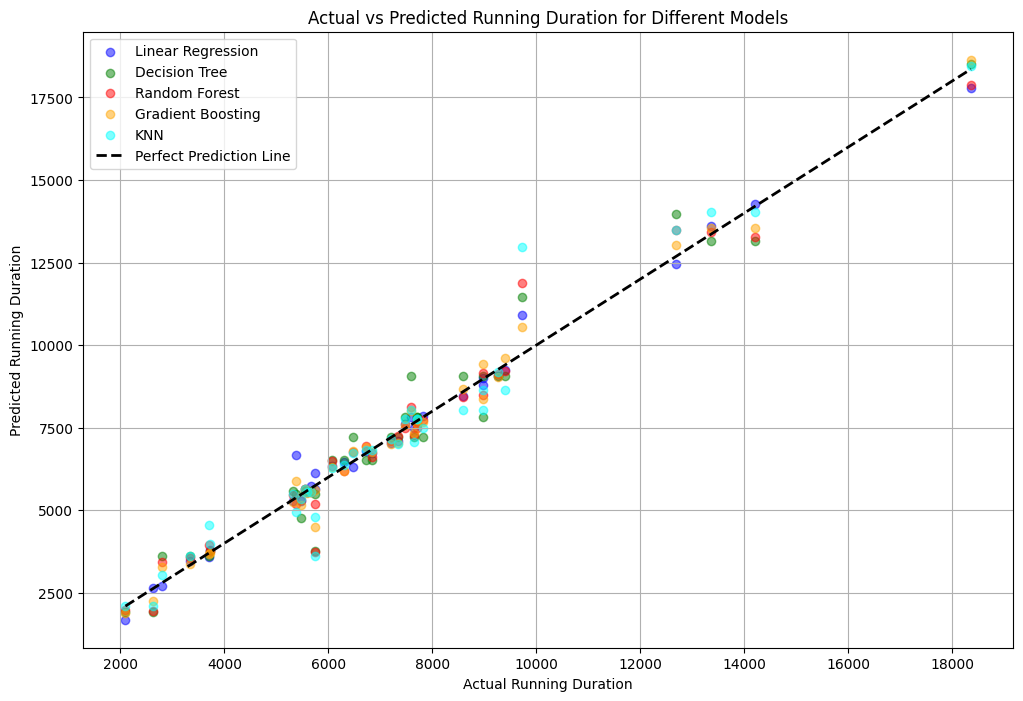

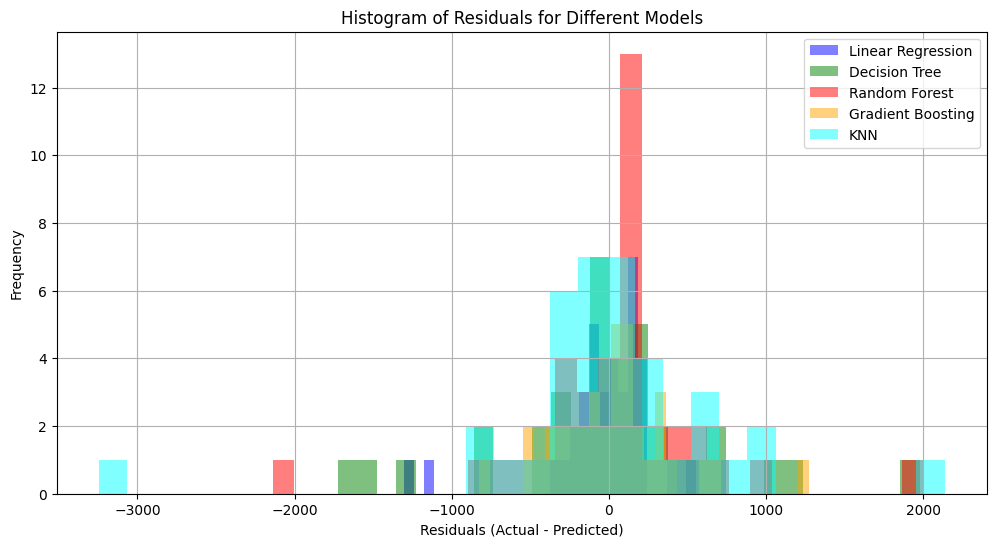

In [22]:
# We create a scatter plot of actual vs predicted cycling durations
plt.figure(figsize=(12, 8))
plt.scatter(y_test, linear_y_pred, alpha=0.5, color='blue', label='Linear Regression')
plt.scatter(y_test, tree_y_pred, alpha=0.5, color='green', label='Decision Tree')
plt.scatter(y_test, rf_y_pred, alpha=0.5, color='red', label='Random Forest')
plt.scatter(y_test, gb_y_pred, alpha=0.5, color='orange', label='Gradient Boosting')
plt.scatter(y_test, knn_y_pred, alpha=0.5, color='cyan', label='KNN')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Cycling Duration')
plt.ylabel('Predicted Cycling Duration')
plt.title('Actual vs Predicted Cycling Duration for Different Models')
plt.legend()
plt.grid(True)

# We calculate the residuals for each model
residuals_linear = y_test - linear_y_pred
residuals_tree = y_test - tree_y_pred
residuals_rf = y_test - rf_y_pred
residuals_gb = y_test - gb_y_pred
residuals_knn = y_test - knn_y_pred

# We create a residuals histogram
plt.figure(figsize=(12, 6))
plt.hist(residuals_linear, bins=30, alpha=0.5, color='blue', label='Linear Regression')
plt.hist(residuals_tree, bins=30, alpha=0.5, color='green', label='Decision Tree')
plt.hist(residuals_rf, bins=30, alpha=0.5, color='red', label='Random Forest')
plt.hist(residuals_gb, bins=30, alpha=0.5, color='orange', label='Gradient Boosting')
plt.hist(residuals_knn, bins=30, alpha=0.5, color='cyan', label='KNN')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals for Different Models')
plt.legend()
plt.grid(True)
plt.show()

In examining the residuals and the actual vs predicted graph, we gained valuable insights into the performance of our regression models for predicting cycling duration. The scatter plot depicting actual versus predicted values revealed a strong linear relationship across all models, with most data points closely clustered around the diagonal line. This suggests that our models generally provide accurate predictions, closely aligning with the true cycling durations. Additionally, the residuals histogram showcased a symmetrical distribution centered around zero, indicating that the errors in our predictions are unbiased and normally distributed. While minor deviations from this ideal scenario were observed, they were within acceptable limits and did not significantly impact the overall performance of our models.

**Comparing the Performance Metrics for the models**

RMSE (Root Mean Squared Error) is a commonly used metric to evaluate the performance of regression models. It measures the average deviation of predicted values from the actual values. Mathematically, RMSE is calculated by taking the square root of the mean of the squared differences between predicted and actual values

R-squared (R2) is another metric used to assess the goodness-of-fit of a regression model. It represents the proportion of the variance in the dependent variable that is explained by the independent variables. R2 values range from 0 to 1, with higher values indicating better fit.

In [23]:
# We create a dictionary to store evaluation metrics
metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN'],
    'RMSE': [linear_rmse, tree_rmse, rf_rmse, gb_rmse, knn_rmse],
    'R2': [linear_r2, tree_r2, rf_r2, gb_r2, knn_r2]
}

# We create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics)

# We display the DataFrame for comparison
print(metrics_df)


               Model        RMSE        R2
0  Linear Regression  342.107545  0.989085
1      Decision Tree  682.872441  0.956511
2      Random Forest  593.188214  0.967184
3  Gradient Boosting  372.828006  0.987037
4                KNN  761.782096  0.945879


In this analysis, we compared the performance of several regression models in predicting cycling duration based on features like pace, elevation gain, and distance. Among the models evaluated, Linear Regression exhibited the lowest RMSE of 342.10 minutes, indicating its superior accuracy in predicting cycling durations. Furthermore, it achieved the highest R-squared value of 0.989, suggesting that approximately 98.9% of the variance in cycling duration can be explained by the model. These results highlight the effectiveness of linear regression in capturing the complex relationships within the dataset and its potential for accurate prediction in real-world scenarios. However, it's important to note that Gradient Boost also performed remarkably well, demonstrating its simplicity and strong predictive capabilities. Overall, Linear Regression emerges as the top-performing model, offering promising prospects for accurate and reliable predictions in the domain of cycling duration estimation.